In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest,f_classif
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from yellowbrick.classifier import confusion_matrix

In [2]:
data=pd.read_csv(r'C:\Users\jayac\Downloads\Dataset\Cellphone.csv')

In [3]:
X=data.drop('price_range',axis=1)
y=data['price_range']

In [4]:
y.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=.25)

In [6]:
svm=SVC()
svm.fit(x_train,y_train)
score_before_scaling=svm.score(x_test,y_test)


In [7]:
score_before_scaling

0.95

In [8]:
X=(X-np.min(X))/(np.max(X)-np.min(X))

In [9]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=.25)

In [11]:
svm=SVC()
svm.fit(x_train,y_train)
score_after_scaling=svm.score(x_test,y_test)
score_after_scaling

0.846

In [16]:
train_accuracy=[]
k=np.arange(1,21)
for i in k:
    select=SelectKBest(f_classif,k=i)
    x_train_new=select.fit_transform(x_train,y_train)
    svm.fit(x_train_new,y_train)
    train_accuracy.append(svm.score(x_train_new,y_train))

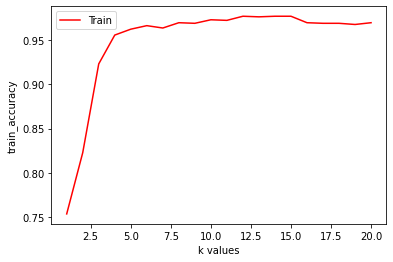

In [18]:
plt.plot(k,train_accuracy,color='red',label='Train')
plt.xlabel('k values')
plt.ylabel('train_accuracy')
plt.legend()
plt.show()

In [23]:
select_top=SelectKBest(f_classif,k=5)
x_train_new=select_top.fit_transform(x_train,y_train)
x_test_new=select_top.fit_transform(x_test,y_test)
print('Top train features',x_train.columns.values[select_top.get_support()])
print('Top test features',x_test.columns.values[select_top.get_support()])
svm.fit(x_train_new,y_train)
train_accuracy.append(svm.score(x_train_new,y_train))

Top train features ['battery_power' 'dual_sim' 'px_height' 'px_width' 'ram']
Top test features ['battery_power' 'dual_sim' 'px_height' 'px_width' 'ram']


In [25]:
c=[1.0,0.25,0.5,0.75]
kernels=['linear','rbf']
gammas=['auto',0.01,0.001,1]

In [29]:
svm=SVC()
grid_svm=GridSearchCV(estimator=svm,param_grid=
                     dict(C=c,kernel=kernels,
                         gamma=gammas),cv=5)

In [30]:
grid_svm.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 0.25, 0.5, 0.75],
                         'gamma': ['auto', 0.01, 0.001, 1],
                         'kernel': ['linear', 'rbf']})

In [31]:
print('The Best Hyperparameters are:',grid_svm.best_estimator_)

The Best Hyperparameters are: SVC(gamma='auto', kernel='linear')


In [34]:
svm_model=SVC(gamma='auto', kernel='linear',C=1.0)
svm_model.fit(x_train_new,y_train)

SVC(gamma='auto', kernel='linear')

In [36]:
print('Train accuracy',svm_model.score(x_train_new,y_train))

Train accuracy 0.9646666666666667


In [37]:
print('Test accuracy',svm_model.score(x_test_new,y_test))

Test accuracy 0.914


In [44]:
y_pred=svm_model.predict(x_test_new)
accuracy_score(y_test,y_pred)

0.914

In [45]:
confusion_matrix(y_test,y_pred)

array([[132,   3,   0,   0],
       [  2, 115,   6,   0],
       [  0,   6, 101,  11],
       [  0,   0,  15, 109]], dtype=int64)

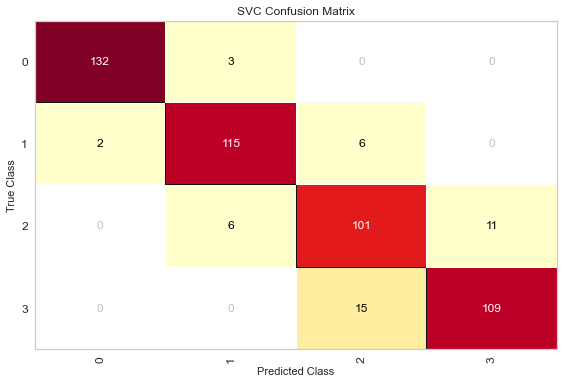

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CFC431370>,
                cmap=<matplotlib.colors.ListedColormap object at 0x0000025CFC5CE6D0>,
                estimator=SVC(gamma='auto', kernel='linear'))

In [53]:
confusion_matrix(estimator=svm_model,X_train=x_train_new,
                y_train= y_train,X_test=x_test_new,
                y_test=y_test)